#Oasis Infobyte Internship
Task 4: Email spam Detection with Machine Learning

Author: Rajnandini

Domain: Data Science

Batch: December-24

#Task 4: Email spam Detection with Machine Learning
#Problem Statement
We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.
In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started!

#Approach :
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Using Classification
learning algorithms that’s best fit for the above case.

#Procedure :
Step 1 : Import Libraries and Dataset

Step 2 : Data Pre-processing
        1. Data Type and conversion
        2. Removing Irrelevant Columns
        3. Identifying & Treatment Missing Value
        4. Identifying & Treatment Outliers
        5. Descriptive Analysis
        6. Correlation
        
Step 3 : Data Visualization
        
Step 4 : Breaking Data into 2 Parts          
        
Step 5 : Model Building
       

         Conclusion

#Step 1 :- Import Libraries and Dataset

In [ ]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt
from PIL import  Image
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go  # Latest package for visualization plotly
import plotly.tools as tls
import plotly.figure_factory as ff

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
# Linking dataset into colab
import io
imdb_df = pd.read_csv(io.BytesIO(uploaded['spam.csv']), encoding='latin-1')

In [ ]:
#Dataset first Look
imdb_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#Dataset last Look
imdb_df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
imdb_df.shape

(5572, 5)

#Step 2 :- Data Pre-Processing
Data Type and conversion Removing Irrelevant Columns Identifying & Treatment Missing Value Identifying & Treatment Outliers Descriptive Analysis Correlation

2.1 Data Type and Conversion

In [ ]:
print("Data types:\n", imdb_df.dtypes)

Data types:
 v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object


In [ ]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


2.2 Removing Irrelevent Columns

In [ ]:
imdb_df = imdb_df.drop('v1', axis=1)

2.3 Identifying and Treatment of Missing Values

In [ ]:
imdb_df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


2.4 Identifying And Treatment of Outliers

<Axes: >

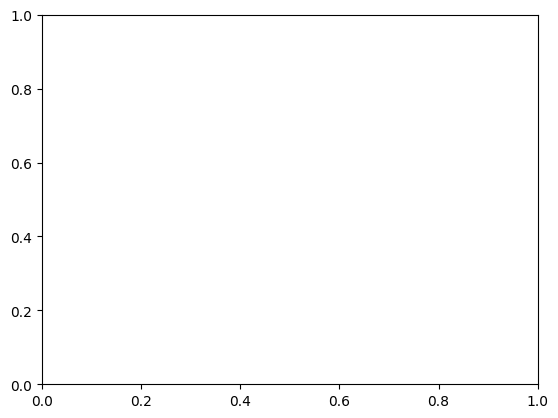

In [ ]:
sns.boxplot(data = imdb_df)

2.5 Descriptive Analysis

In [ ]:
imdb_df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:

Correlation = imdb_df.corr( numeric_only=True )
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

<Axes: >

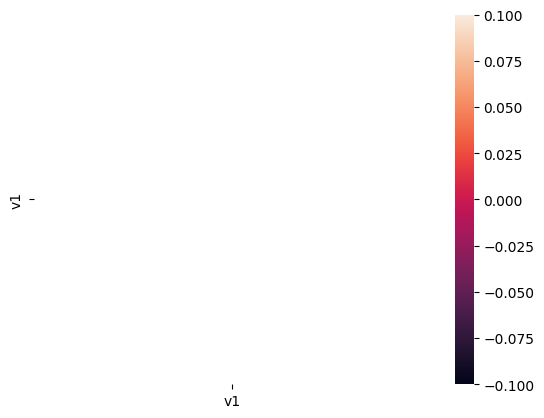

In [ ]:
sns.heatmap(imdb_df.corr(numeric_only=True), annot=True)

#Step 3 : Data Visualization

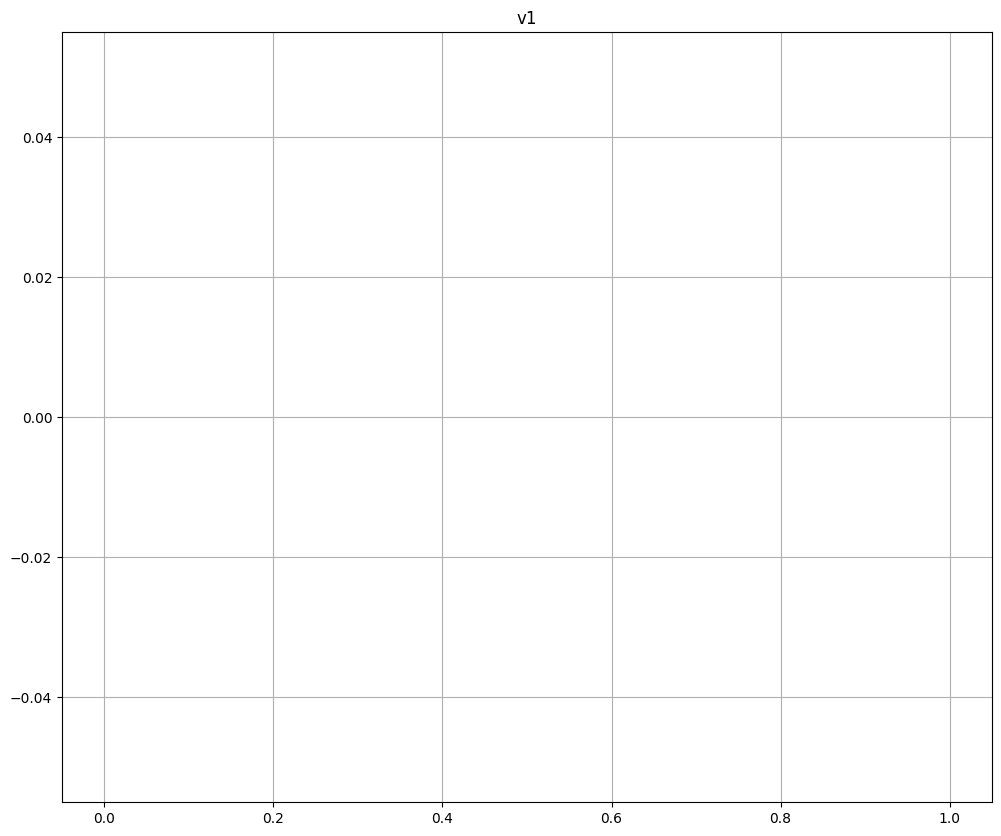

In [ ]:

imdb_df.hist(figsize=(12, 10), bins=20)
plt.show()

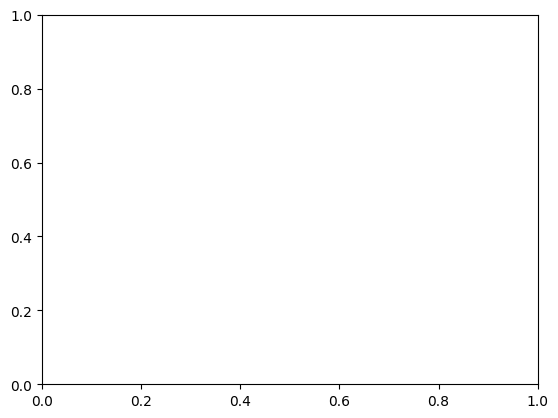

In [ ]:
sns.boxplot(data=imdb_df.select_dtypes(include=['float64', 'int64']))
plt.show()

In [ ]:
for col in imdb_df.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'v1':  # Replace 'price' with your target column
        sns.scatterplot(x=imdb_df[col], y=imdb_df['v1'])
        plt.show()

#Step 4 : Breaking Dataset into 2 Parts

In [ ]:
# Quantitative Variable (Numbers)
Quantitative_Variable = imdb_df[imdb_df.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(5)

,v1


In [ ]:
# Qualitative Variable (Objects)
Qualitative_Variable = imdb_df[imdb_df.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(5)

,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4


#Step 5 : Model building

1. Train the Logistic Regression Model

In [ ]:

# Import the LogisticRegression class from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Now you can create and use the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

2. Test the Model

In [ ]:
y_pred = model.predict(X_test)

3. Evaluate the Model

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.2459016393442623
Confusion Matrix:
 [[ 0  0  0  0  0  0  1  1  0  0]
 [ 0  0  0  2  0  0  0  1  1  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  1  0  2  0  2  1  0]
 [ 0  0  0  0  0  3  0  2  0  0]
 [ 0  0  0  0  0  2  1  6  0  0]
 [ 0  0  0  1  0  1  0 11  0  0]
 [ 0  0  0  0  0  1  1  6  0  0]
 [ 0  0  0  0  0  0  0 10  1  0]]
Classification Report:
               precision    recall  f1-score   support

        2006       0.00      0.00      0.00         2
        2008       0.00      0.00      0.00         4
        2009       0.00      0.00      0.00         1
        2010       0.00      0.00      0.00         2
        2011       0.00      0.00      0.00         6
        2013       0.30      0.60      0.40         5
        2014       0.20      0.11      0.14         9
        2015       0.28      0.85      0.42        13
        2016       0.00      0.00      0.00         8
        2017       0.00      0.00      0.00        11

 